### Challenge - What test to use ###

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [7]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [8]:
df = df.dropna()

In [38]:
df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [9]:
trust_2012 = df[df["year"] == 6][["cntry", "ppltrst"]]
trust_2014 = df[df["year"] == 7][["cntry", "ppltrst"]]

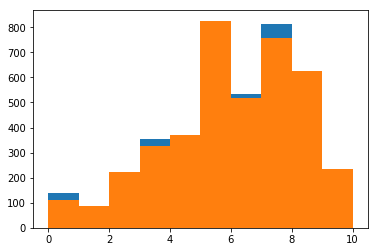

In [17]:
plt.hist(trust_2012["ppltrst"])
plt.hist(trust_2014["ppltrst"]);

In [23]:
for x in df['cntry'].unique().tolist():
    print(x)
    print(stats.ttest_ind(trust_2012[df['cntry'] == x]['ppltrst'],trust_2014[df['cntry'] == x]['ppltrst']));

CH
Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)
CZ
Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)
DE
Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)
ES
Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)
NO
Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131978)
SE
Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)


C:\Users\Jillian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Among all of the countries, the trust did not change from 2012 to 2014. However there appears to be a significant difference for ES and SE.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [24]:
hppy_2012 = df[df["year"] == 6][["cntry", "happy"]]
hppy_2014 = df[df["year"] == 7][["cntry", "happy"]]

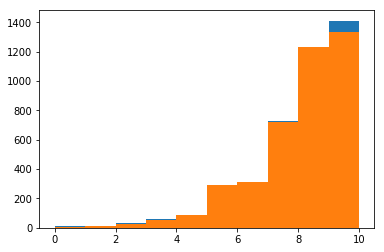

In [25]:
plt.hist(hppy_2012["happy"])
plt.hist(hppy_2014["happy"]);

In [27]:
for x in df['cntry'].unique().tolist():
    print(x)
    print(stats.ttest_ind(hppy_2012[df['cntry'] == x]['happy'],hppy_2014[df['cntry'] == x]['happy']));

CH
Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018)
CZ
Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)
DE
Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)
ES
Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)
NO
Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05)
SE
Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388)


C:\Users\Jillian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Similar to before, among all of the countries not much significant difference in happiness between 2012 and 2014. However NO seems to have a significant difference.

3. Who reported watching more TV in 2012, men or women?

In [28]:
tv_male = df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 6)]
tv_female = df['tvtot'][(df['gndr'] == 2.0) & (df['year'] == 6)]

In [32]:
print(stats.ttest_ind(tv_male, tv_female))

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)


3.8592303945445687
3.9053518334985133


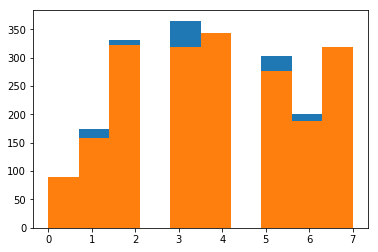

In [34]:
plt.hist(tv_male)
plt.hist(tv_female);

print(tv_male.mean())
print(tv_female.mean())

Females appeared to have watched more TV back in 2012 than males, however, there is no significant difference.

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [35]:
fair_single = df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 6)]
fair_partner = df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 6)]

In [36]:
print(stats.ttest_ind(fair_single, fair_partner))

Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


6.0743509047993705
5.86592544146501


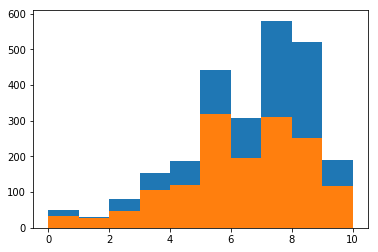

In [37]:
plt.hist(fair_single)
plt.hist(fair_partner);

print(fair_single.mean())
print(fair_partner.mean())

There appears to be a significant difference in the belief of fairness between single and partnered people. With single people being more likely to believe people were fair.

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [39]:
ch = df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)]
cz = df['sclmeet'][(df['cntry'] == 'CZ') & (df['year'] == 7)]
de = df['sclmeet'][(df['cntry'] == 'DE') & (df['year'] == 7)]

5.174966352624495
4.4950495049504955
4.428571428571429


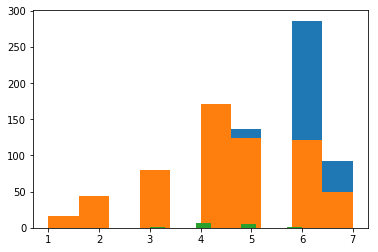

In [40]:
plt.hist(ch)
plt.hist(cz)
plt.hist(de);

print(ch.mean())
print(cz.mean())
print(de.mean())

In [42]:
F, p = stats.f_oneway(ch,cz,de)
print(F)
print(p)

41.471633201652644
3.288241543230333e-18


In [43]:
print(stats.ttest_ind(ch, cz))
print(stats.ttest_ind(cz, de))
print(stats.ttest_ind(de, ch))

Ttest_indResult(statistic=8.998568888102158, pvalue=7.58694000913212e-19)
Ttest_indResult(statistic=0.16846066305094798, pvalue=0.8662760053993819)
Ttest_indResult(statistic=-2.137774079859156, pvalue=0.032855611686425916)


There appears to be a very significant difference in how often people met socially in 2014 in CH in comparison to DE and CZ.

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [44]:
ch = df['sclact'][(df['cntry'] == 'CH') & (df['year'] == 7)]
cz = df['sclact'][(df['cntry'] == 'CZ') & (df['year'] == 7)]
de = df['sclact'][(df['cntry'] == 'DE') & (df['year'] == 7)]

2.784656796769852
2.7293729372937294
2.7142857142857144


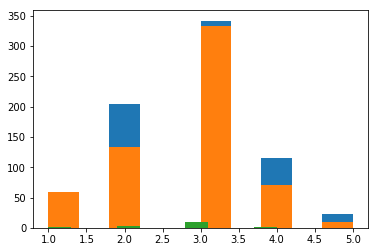

In [45]:
plt.hist(ch)
plt.hist(cz)
plt.hist(de);

print(ch.mean())
print(cz.mean())
print(de.mean())

In [46]:
F, p = stats.f_oneway(ch,cz,de)
print(F)
print(p)

0.6805323062052006
0.5065197308755334


In [47]:
print(stats.ttest_ind(ch, cz))
print(stats.ttest_ind(cz, de))
print(stats.ttest_ind(de, ch))

Ttest_indResult(statistic=1.148808631379681, pvalue=0.25083885461561173)
Ttest_indResult(statistic=0.06625763933618, pvalue=0.9471941363231762)
Ttest_indResult(statistic=-0.28869953984944624, pvalue=0.7728905598034453)


There does not appear to be a significant difference in how often people took part in social activities within the three different countries.